In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('airbnb.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape

(48895, 16)

Através do .shape podemos verificar que o dataframe é composto por 48895 linhas e 16 colunas. Cada linha representa um local disponível para locação.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Através do info( ) podemos verificar quais os tipos das variáveis do dataset, a quantidade de valores não nulos em cada coluna e a quantidade de memória usada. Temos 3 variáveis do tipo float64, 7 do tipo int64 e 6 do tipo object.

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Combinando as funções .isna() e .sum() podemos verificar a quantidade de valores missing por coluna. Temos uma grande quantidade de valores missing (20,5%) nas colunas last_review e reviews_per_month. 

In [ ]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

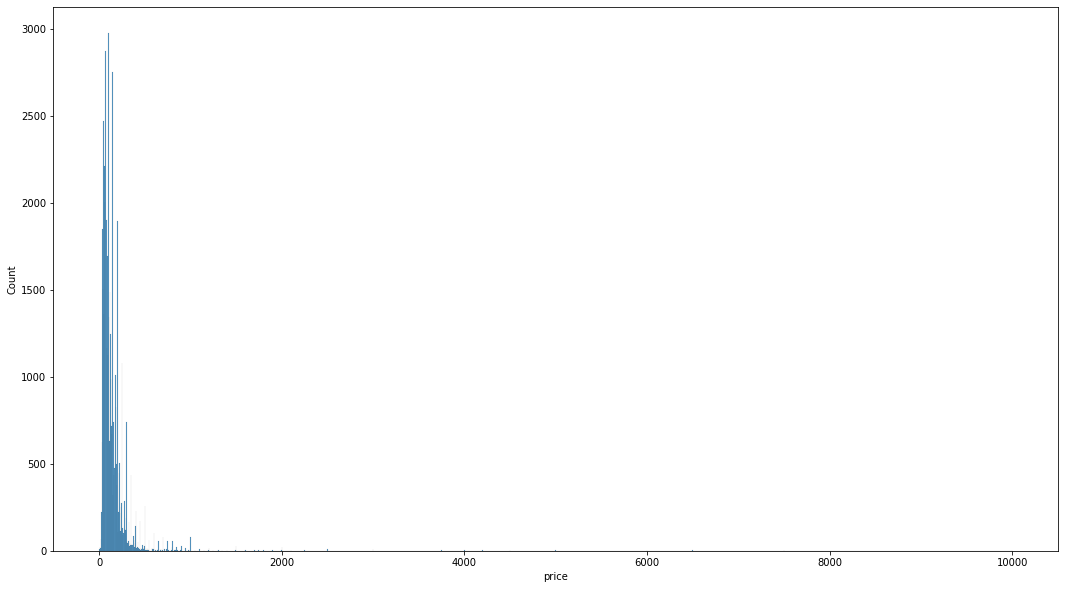

In [ ]:
plt.figure(figsize=(18,10))
sns.histplot(df['price'])

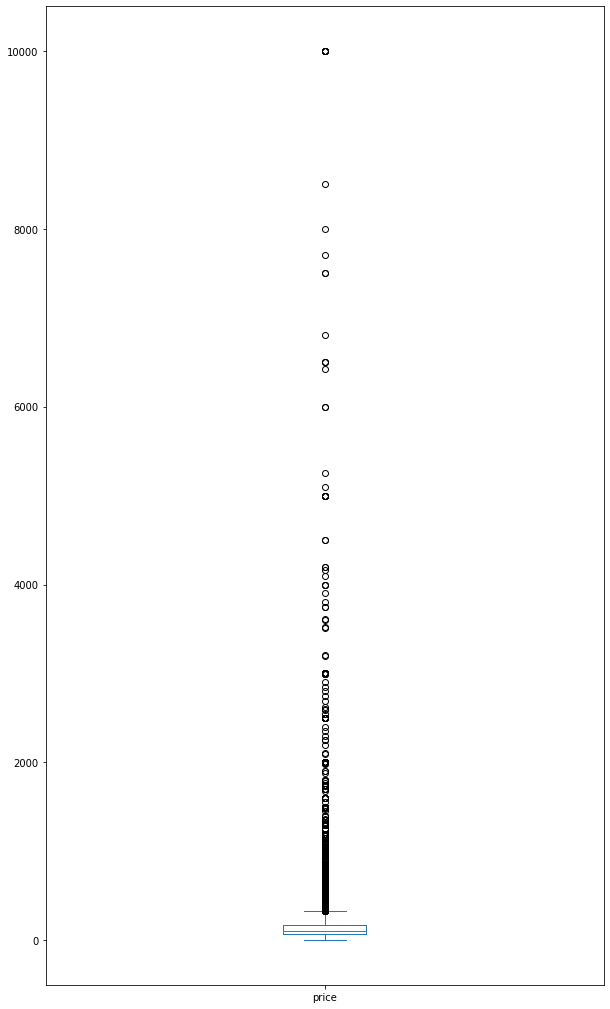

In [ ]:
df.price.plot.box(figsize=(10,18))

In [ ]:
(df.loc[df['price']>175]).shape

(12177, 16)

Através do método describe() vimos que a média de preços dos aluguéis é 152,72 dólares, porém o desvio padrão é 2140,15 dólares o que nos mostra que há uma grande dispersão dos dados com relação a média.
Para entender melhor essa dispersão, foi plotado um boxplot e pode-se observar que a área do mesmo é bastante estreita e que temos uma grande quantidade de outliers. 
Utilizando a função loc[] e filtrando para valores acima do terceiro quartil, verificamos que há 12177 (25% dos dados) valores de preços acima de 175 dólares, sendo o máximo valor de aluguel encontrado igual a 10000 dólares.

In [ ]:
df.groupby(['neighbourhood_group']).price.mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

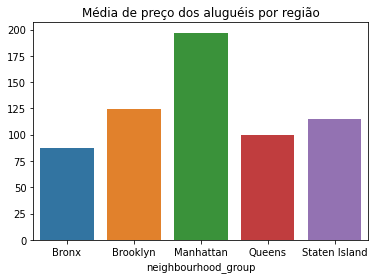

In [ ]:
plt.title("Média de preço dos aluguéis por região")
sns.barplot(x=df.groupby(['neighbourhood_group']).price.mean().index,y=df.groupby(['neighbourhood_group']).price.mean().values)

Pode-se notar que Manhattan tem uma média de valor de aluguel bem acima das outras regiões da cidade. Isso se deve ao fato que Manhattan é a região mais famosa de Nova York, concentrando a maior parte das atrações da cidade.
As regiões do Brooklyn e Staten Island apresentam médias de aluguéis bem semelhantes. O Bronx apresenta a menor média de aluguéis pois é considerado a região mais pobre da cidade.

In [ ]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

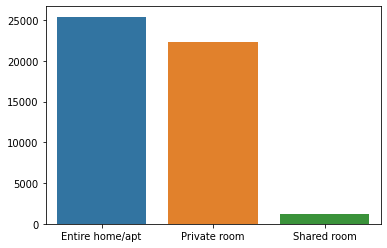

In [ ]:
sns.barplot(x=df.room_type.value_counts().index,y=df.room_type.value_counts().values)

Verificamos que o tipo mais comum de locação é casa/apartamento inteiro. 
Podemos notar que as pessoas preferem locar cômodos privados do que compartilhados, visto que os quartos compartilhados representam apenas 2,37% do total de cômodos disponíveis.

In [ ]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

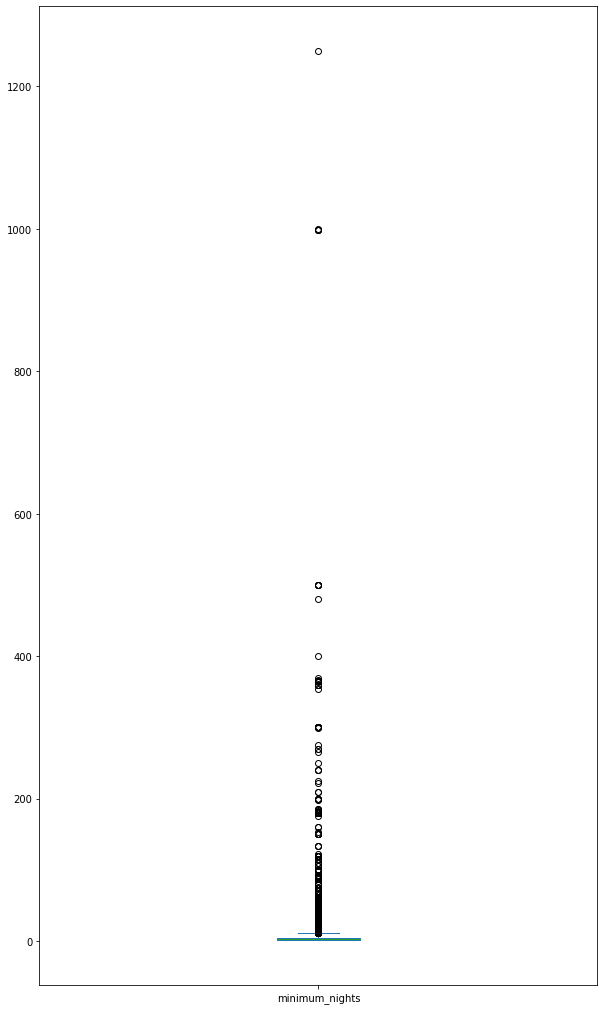

In [ ]:
df.minimum_nights.plot.box(figsize=(10,18))

In [ ]:
(df.loc[df['minimum_nights']>5]).shape

(10143, 16)

Através do resumo estatístico da variável noites mínimas, verificamos uma média igual a 7 dias, desvio padrão igual a 20,5 diias e mediana igual a 3 dias. Foi plotado um boxplot a fim de compreender melhor a distribuição dos dados e podemos ver que há uma grande presença de outliers. 
O airbnb pode ser usado para anúncios de aluguéis por temporadas curtas, pessoas que estão a passagem na cidade, e também para anunciar imóveis disponíveis para moradia fixa. Este último tipo de aluguel é que pode causar a presença de outliers.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


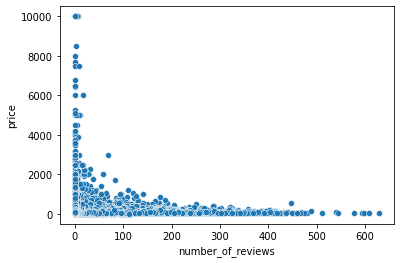

In [ ]:
sns.scatterplot(x=df['number_of_reviews'],y=df['price'])

Através do gráfico de dispersão podemos ver que não há uma relação direta entre quantidade de reviews e o preço dos aluguéis.

In [ ]:
df_corr=df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
df_corr.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,149,1,9,6,365
1,225,1,45,2,355
2,150,3,0,1,365
3,89,1,270,1,194
4,80,10,9,1,0


In [ ]:
df_corr.shape

(48895, 5)

In [ ]:
df_corr.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.225701,1.000000


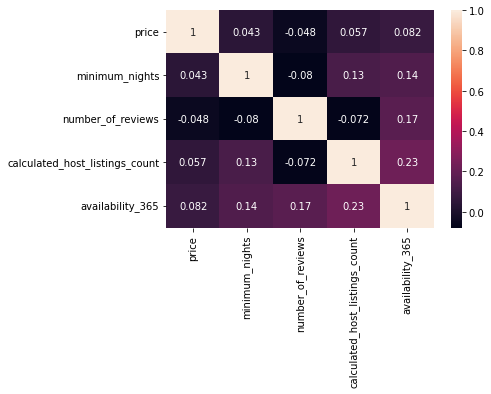

In [ ]:
sns.heatmap(data=df_corr.corr(), annot=True)

A correlação nos ajuda a entender qual a relação entre duas ou mais variáveis, ou seja, quanto uma variável infere na outra. Por padrão, a função .corr() do Pandas utiliza a correlação de Pearson, mas também podemos utilizar outros tipos como o Kendall e Spearman, bastando passar o parametro method='pearson' como argumento da função.
A correlação de Pearson nos fornece um coeficiente que varia entre -1 e 1, sendo que: entre 0 e 1 temos uma correlação positiva, ou seja, as duas variáveis crescem ou descrescem juntas; entre 0 e -1 temos uma correlação negativa, ou seja, quando uma variável cresce a outra decresce e vice-versa.
Como podemos interpretar os valores que ρ (coeficiente de Pearson) pode assumir?

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

O Pandas utiliza todas as variáveis numéricas para o cálculo do coeficiente de correlação, porém não faz sentido utilizar todas as nossas variáveis numéricas para isso. Variáveis como id, host_id, latitude e longitude sabemos que não influenciam na correlação. A variável reviews_per_month não fui utilizada pois há uma grande quantidade de valores missing.
Através da matriz de correlação obtida podemos ver que não há correlação entre as variáveis, segundo a literatura. O maior valor de correlação obtido foi 0,2257 entre as variáveis availability_365 e calculated_host_listings_count, mostrando que quanto mais anúncios (locais anunciados) o host tem, mais dias disponíveis tem para locação.

**Tratamento de Valores Missing**

In [ ]:
new_df=df.copy()

In [ ]:
new_df.reviews_per_month=new_df.reviews_per_month.fillna(0)

In [ ]:
new_df.name=new_df.name.fillna('Unknown')
new_df.host_name=new_df.host_name.fillna('Unknown')

In [ ]:
new_df.drop(['last_review'],axis=1,inplace=True)

In [ ]:
new_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
new_df.shape

(48895, 15)

In [ ]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Para concluir a nossa manipulação dos dados no Pandas, fizemos o tratamento dos valores missing. Foi utilizada a função .copy() para criarmos um novo dataframe como uma cópia do original.
Na variável reviews_per_month decidimos completar com 0 os valores ausentes, já que não temos nenhuma informação que ajude a completar de outra forma essa variável.
Nas variáveis name e host_name passamos o valor 'Unknown', já que se trata do nome de uma pessoa e descrição do imóvel por parte do seu proprietário.
A variável last_review não é algo relevante quando uma pessoa está procurando um local para alugar, e como havia uma grande quantidade de valores ausentes, optou-se por fazer o drop.

**Conclusão**

Através desta análise foi possível praticar e conhecer melhor as ferramentas que a biblioteca Pandas nos disponibiliza para a manipulação dos dados. Também foi possível conhecer melhor as características dos imóveis disponíveis no Airbnb na cidade de Nova York e descobrir que não há uma correlação entre as variáveis estudadas.